In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd
import json
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re

# height

In [4]:
# Specify the path to the folder containing your JSON files
folder_path = 'Residential_Clear'

# Initialize an empty list to store the JSON data
data = []

# Iterate over each file in the folder
for filename in tqdm(os.listdir(folder_path)):
    if filename.endswith('.json'):  # Ensure that only JSON files are processed
        file_path = os.path.join(folder_path, filename)
        
        # Open and read each JSON file
        with open(file_path) as f:
            json_data = json.load(f)
            
            # Append the JSON data to the list. Note the change here:
            # Instead of appending the list, we are extending 'data' with the new data.
            data.extend(json_data)

# Save the concatenated data to a new file
output_file = 'Residential_Clean.json'
with open(output_file, 'w') as f:
    json.dump(data, f)

print('JSON files concatenated successfully and saved to', output_file)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Residential_Clear'

In [10]:
json_file = 'Residential_Metadata.json'
df = pd.read_json(json_file, orient='records')
df

,OBJECTID,YearBuilt1,HEIGHT,UseDescription
0,37,1977.0,22.26,1
1,40,1923.0,9.92,4
2,43,1927.0,18.32,4
3,46,1977.0,21.89,5
4,52,1938.0,11.64,3
...,...,...,...,...
2801369,2618766,1976.0,17.27,6
2801370,2618767,1972.0,14.99,6
2801371,2618768,1962.0,23.27,3
2801372,2618769,1963.0,12.62,3


In [24]:
df[df['HEIGHT'] ==0]

,OBJECTID,YearBuilt1,HEIGHT,UseDescription
264686,2830162,1975.0,0.0,3
264721,2830206,1977.0,0.0,3
264774,2830262,2002.0,0.0,3
264870,2830365,1989.0,0.0,3
415890,2970487,1976.0,0.0,3
...,...,...,...,...
2764395,2572637,1937.0,0.0,3
2764397,2572639,1924.0,0.0,3
2764406,2572648,1922.0,0.0,3
2764435,2572679,1940.0,0.0,3


In [11]:
df = df[df['HEIGHT'] != 0]
df

,OBJECTID,YearBuilt1,HEIGHT,UseDescription
0,37,1977.0,22.26,1
1,40,1923.0,9.92,4
2,43,1927.0,18.32,4
3,46,1977.0,21.89,5
4,52,1938.0,11.64,3
...,...,...,...,...
2801369,2618766,1976.0,17.27,6
2801370,2618767,1972.0,14.99,6
2801371,2618768,1962.0,23.27,3
2801372,2618769,1963.0,12.62,3


In [12]:
df_clean = pd.read_csv("clean.csv")
df_clean

,Unnamed: 0,OBJECTID,YearBuilt1,HEIGHT,UseDescription
0,0,37,1977.0,22.26,1
1,1,40,1923.0,9.92,4
2,2,43,1927.0,18.32,4
3,3,46,1977.0,21.89,5
4,4,52,1938.0,11.64,3
...,...,...,...,...,...
2620177,2801369,2618766,1976.0,17.27,6
2620178,2801370,2618767,1972.0,14.99,6
2620179,2801371,2618768,1962.0,23.27,3
2620180,2801372,2618769,1963.0,12.62,3


In [26]:
df.to_csv("clean.csv")

In [35]:
df = df_clean[(df_clean['HEIGHT'] < 100)]
df['HEIGHT_norm'] = (df['HEIGHT'] - np.min(df['HEIGHT'])) / (np.max(df['HEIGHT']) - np.min(df['HEIGHT']))
df

C:\Users\xinwei\AppData\Local\Temp\ipykernel_6136\2096960958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HEIGHT_norm'] = (df['HEIGHT'] - np.min(df['HEIGHT'])) / (np.max(df['HEIGHT']) - np.min(df['HEIGHT']))


,Unnamed: 0,OBJECTID,YearBuilt1,HEIGHT,UseDescription,HEIGHT_norm
0,0,37,1977.0,22.26,1,0.220044
1,1,40,1923.0,9.92,4,0.095999
2,2,43,1927.0,18.32,4,0.180438
3,3,46,1977.0,21.89,5,0.216325
4,4,52,1938.0,11.64,3,0.113289
...,...,...,...,...,...,...
2620177,2801369,2618766,1976.0,17.27,6,0.169883
2620178,2801370,2618767,1972.0,14.99,6,0.146964
2620179,2801371,2618768,1962.0,23.27,3,0.230197
2620180,2801372,2618769,1963.0,12.62,3,0.123140


In [36]:
df[['OBJECTID', 'HEIGHT_norm']].to_csv("clean_forplot.csv")

In [20]:
df2 = pd.read_csv("building_metadata_height.csv")
df2

,OBJECTID,HEIGHT_norm
0,37,0.220044
1,40,0.095999
2,43,0.180438
3,46,0.216325
4,52,0.113289
...,...,...
1048570,856499,0.162143
1048571,856500,0.162143
1048572,856501,0.178729
1048573,856502,0.261661


In [19]:
df_1048575 = pd.read_csv("building_metadata_height_1048575.csv")
df_1048575

,OBJECTID,HEIGHT_norm
0,37,0.220044
1,40,0.095999
2,43,0.180438
3,46,0.216325
4,52,0.113289
...,...,...
1048570,856499,0.162143
1048571,856500,0.162143
1048572,856501,0.178729
1048573,856502,0.261661


In [31]:
df_2620182 = pd.read_csv("clean_forplot.csv")
df_2620182

,Unnamed: 0,OBJECTID,HEIGHT_norm
0,0,37,0.023710
1,1,40,0.010344
2,2,43,0.019442
3,3,46,0.023309
4,4,52,0.012207
...,...,...,...
2620177,2801369,2618766,0.018305
2620178,2801370,2618767,0.015835
2620179,2801371,2618768,0.024804
2620180,2801372,2618769,0.013268


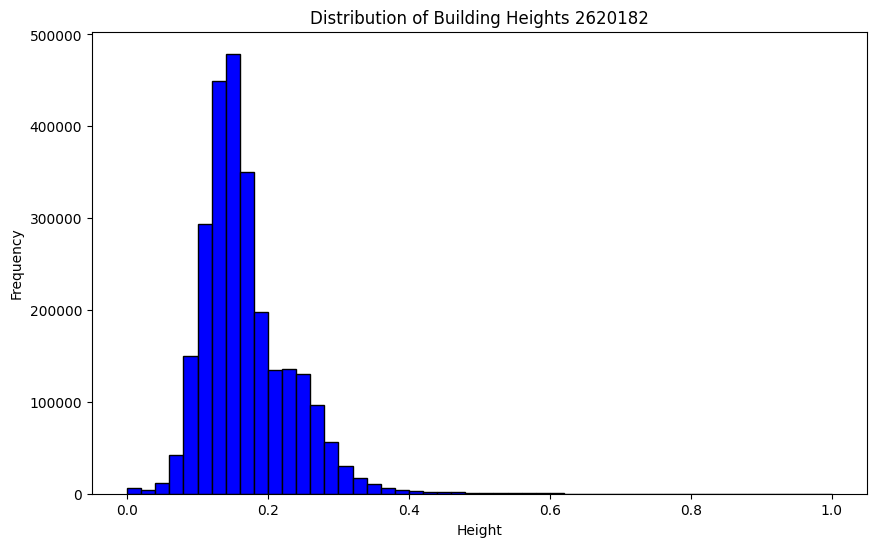

In [37]:
plt.figure(figsize=(10,6))  # Size of the figure, you can adjust as per your need
plt.hist(df['HEIGHT_norm'], bins=50, color='blue', edgecolor='black')  # Adjust bins as per your need
plt.title('Distribution of Building Heights 2620182')
plt.xlabel('Height')
plt.ylabel('Frequency')
# plt.xlim(0, 100)
plt.show()

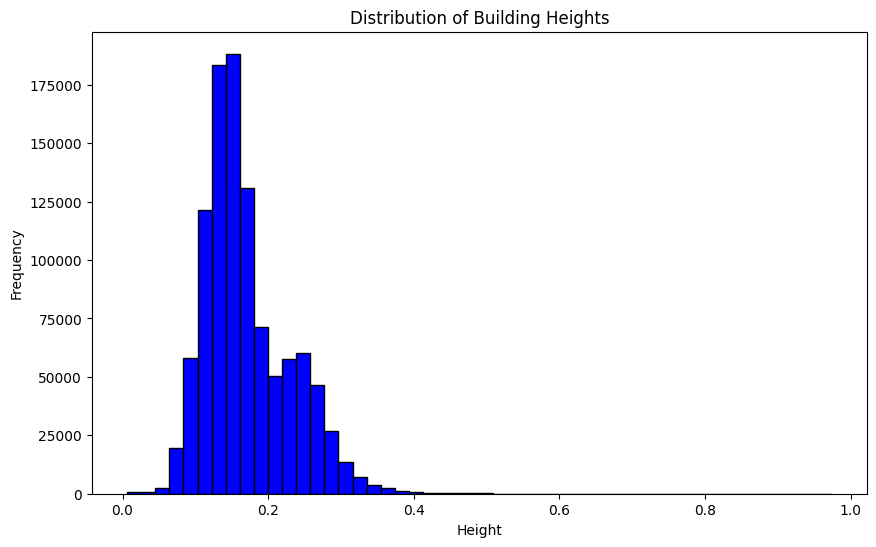

In [29]:
plt.figure(figsize=(10,6))  # Size of the figure, you can adjust as per your need
plt.hist(df_1048575['HEIGHT_norm'], bins=50, color='blue', edgecolor='black')  # Adjust bins as per your need
plt.title('Distribution of Building Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
# plt.xlim(0, 100)
plt.show()

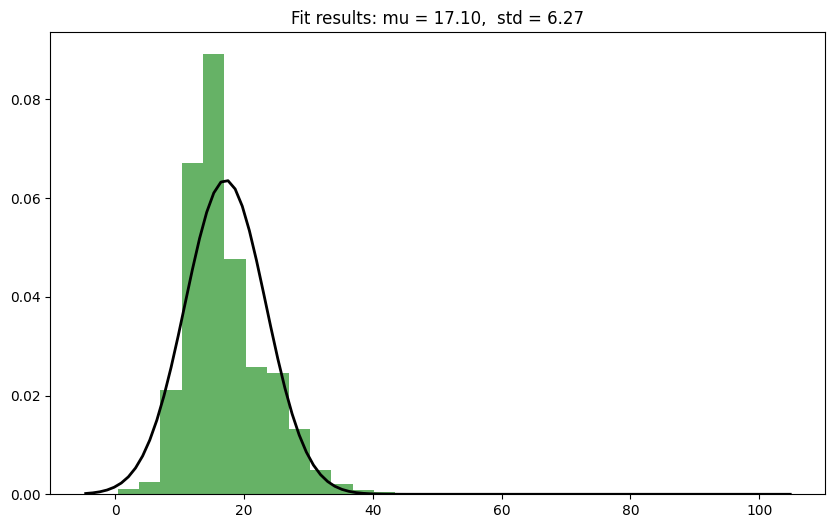

In [64]:
mu, std = norm.fit(df['HEIGHT'])

plt.figure(figsize=(10,6)) # Size of the figure, you can adjust as per your need

# Plot the histogram.
plt.hist(df['HEIGHT'], bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [86]:

def assign_grayscale_color(buildingHeight):
    # Calculate mean and standard deviation
    mean = np.mean(buildingHeight)
    std = np.std(buildingHeight)

    # Normalize the values
    normalized_heights = (buildingHeight - mean) / std

    # Clip values to [0, 1] range
    normalized_heights = np.clip(normalized_heights, 0, 1)

    # Create a colormap with reversed grayscale
    cmap = cm.get_cmap('gray_r')

    # Map normalized heights to colormap indices
    colors = cmap(normalized_heights)

    # Convert RGBA values to grayscale
    grayscale_colors = np.dot(colors[:, :3], [0.2989, 0.5870, 0.1140])

    # Round grayscale values to two decimal places
    grayscale_colors = np.round(grayscale_colors, 2)

    return grayscale_colors

In [82]:
buildingHeight = sampled_df['HEIGHT'].tolist()

# processing

In [26]:

# List of attributes you want to keep
attributes = ['OBJECTID', 'CODE', 'BLD_ID', 'YearBuilt1', 'HEIGHT', 'ELEV', 'LARIAC_BUILDINGS_2014_AREA',  'UseType',
       'UseDescription', 'Shape_Length_1', 'Shape_Area_1', 'geometry']

# Your input directory containing the original GeoJSON files
input_directory = 'geojson'

# Your output directory for the cleaned GeoJSON files
output_directory = 'clean_geojson'

# Make sure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Get the list of all the files in the input directory
files = [f for f in os.listdir(input_directory) if f.endswith('.json')]

# Loop through all the files in the input directory with a progress bar
for filename in tqdm(files, desc='Processing files'):
    # Construct the full file path
    file_path = os.path.join(input_directory, filename)

    # Load the GeoJSON file
    data = gpd.read_file(file_path)

    # Select the attributes
    data = data[attributes]

    # Rename 'LARIAC_BUILDINGS_2014_AREA' to 'footprint'
    data = data.rename(columns={'LARIAC_BUILDINGS_2014_AREA': 'footprint'})

    # Construct the output file path
    output_file_path = os.path.join(output_directory, filename)

    # Save the cleaned GeoJSON file
    data.to_file(output_file_path, driver='GeoJSON')

Processing files: 100%|████████████████████████████████████████████████████████████| 120/120 [1:15:09<00:00, 37.58s/it]


In [28]:
# Your input directory containing the original GeoJSON files
input_directory = 'clean_geojson'

# Your output directory for the cleaned GeoJSON files
output_directory = 'Residential'

# Make sure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Get the list of all the files in the input directory
files = [f for f in os.listdir(input_directory) if f.endswith('.json')]

# Loop through all the files in the input directory with a progress bar
for filename in tqdm(files, desc='Processing files'):
    # Construct the full file path
    file_path = os.path.join(input_directory, filename)

    # Load the GeoJSON file
    data = gpd.read_file(file_path)

    # Filter data to only include rows where 'UseType' is 'Residential'
    data = data[data['UseType'] == 'Residential']

    # If the filtered data is empty, continue to the next iteration
    if data.empty:
        continue

    # Construct the output file path
    output_file_path = os.path.join(output_directory, filename)

    # Save the cleaned GeoJSON file
    data.to_file(output_file_path, driver='GeoJSON')

Processing files: 100%|██████████████████████████████████████████████████████████████| 120/120 [28:35<00:00, 14.30s/it]


get the maximum size of the residential for plotting

# plot

In [5]:
height_data = pd.read_csv('clean_forplot.csv')
height_data = height_data.drop('Unnamed: 0', axis=1)
height_data

,OBJECTID,HEIGHT_norm
0,37,0.220044
1,40,0.095999
2,43,0.180438
3,46,0.216325
4,52,0.113289
...,...,...
2619835,2618766,0.169883
2619836,2618767,0.146964
2619837,2618768,0.230197
2619838,2618769,0.123140


In [6]:
def plot_geometry(gdf, directory_path):
    # Get the 'OBJECTID' from gdf
    obj_id = gdf['OBJECTID'].values[0]
    # Check if 'OBJECTID' exists in height_data
    if obj_id not in height_data['OBJECTID'].values:
        return
    # Find the corresponding 'HEIGHT_norm' value
    height_norm = height_data.loc[height_data['OBJECTID'] == obj_id, 'HEIGHT_norm'].values[0]

    # gdf = gdf.set_crs(epsg=4326)
    utm_proj = "+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs"
    gdf_utm = gdf.to_crs(utm_proj)
    fig, ax = plt.subplots(figsize=(5,5))  # Adjust the figure size as needed

    # Use 'HEIGHT_norm' value for color mapping
    cmap = plt.colormaps.get_cmap('binary')
    gdf_utm.plot(ax=ax, aspect='equal', alpha=0.5, edgecolor='k', color=cmap(height_norm))

    # Get the limits of x and y axes
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Calculate the center point of x and y
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2

    # Change this value to the largest residential size
    length_half = 250

    new_x_min = x_center - length_half
    new_x_max = x_center + length_half
    new_y_min = y_center - length_half
    new_y_max = y_center + length_half

    ax.set_xlim(new_x_min, new_x_max)
    ax.set_ylim(new_y_min, new_y_max)

    # Show the plot
    ax.set_axis_off()
    plt.tight_layout()

    save_file_path = os.path.join(directory_path, f"{obj_id}.png")
    plt.savefig(save_file_path, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close('all')

if mannually code checkpoint

In [10]:
data = {
    "filename": "geojson_0.json",
    "OBJECTID": 0
}

with open('checkpoint.json', 'w') as checkpoint_file:
    json.dump(data, checkpoint_file)

In [7]:
# Checkpoint file name
checkpoint_file = 'checkpoint.json'

# If the checkpoint file exists, load the last processed filename and OBJECTID
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as file:
        checkpoint = json.load(file)
        last_file_processed = checkpoint.get('filename')
        last_objectid_processed = checkpoint.get('OBJECTID')
else:
    last_file_processed = None
    last_objectid_processed = None
print(last_file_processed, last_objectid_processed)

geojson_0.json 3523


In [8]:
input_directory = "Residential"
files = [filename for filename in os.listdir(input_directory) if filename.endswith('.json')]

files = os.listdir(input_directory)

# Extract numbers from filenames and pair with filenames
files_with_numbers = [(int(re.findall(r'\d+', filename)[0]), filename) for filename in files]

# Sort the filenames based on the numbers
files_with_numbers.sort()

# Get sorted filenames
sorted_files = [filename for _, filename in files_with_numbers]
sorted_files[0]

'geojson_0.json'

## note that the footprint with height is 2619840, where the footprint is 2619840 

In [9]:
last_file_number = re.search(r'\d+', last_file_processed)
int(last_file_number.group())

0

In [ ]:
last_file_number = re.search(r'\d+', last_file_processed)
if last_file_number is None:
    last_file_number = 0
else:
    last_file_number = int(last_file_number.group())
        
# Loop through all the files in the input directory with a progress bar
for filename in sorted_files:
    # ExtractA the numeric part of the filename
    file_number = re.search(r'\d+', filename)
    if file_number is None:
        continue
    file_number = int(file_number.group())  # Convert the numeric part to an integer

    # If the last processed file is ahead in the list, skip this file
    if file_number < last_file_number:
        continue
    # Construct the full file path
    file_path = os.path.join(input_directory, filename)
    

    # Load the GeoJSON file
    data = gpd.read_file(file_path)
    print(file_path)
    # Specify the directory path you want to create
    filename_prefix = filename.split(".")[0]
    directory_path = f"img_gray\{filename_prefix}"
    # Check if the directory path already exists
    if not os.path.exists(directory_path):
        # Create the directory path
        os.makedirs(directory_path)

    # If this file was processed last, start from the next OBJECTID, else start from the beginning
    start_index = data[data['OBJECTID'] > last_objectid_processed].index[0] if filename == last_file_processed else 0
    print(file_number, start_index)
    
    # Iterate over the rows with a progress bar
    for idx, row in tqdm(data.loc[start_index:].iterrows(), total=len(data), desc='Processing df'):
    # for idx, row in tqdm(data.iterrows(), total=len(data), desc='Processing df'):
        this_df = data.iloc[[idx]]
        plot_geometry(this_df, directory_path)

        # Update the checkpoint file
        objectid = int(this_df['OBJECTID'].values[0])
        checkpoint = {'filename': filename, 'OBJECTID': objectid}
        with open(checkpoint_file, 'w') as file:
            json.dump(checkpoint, file)

Residential\geojson_0.json
0 2783


Processing df:  87%|█████████████████████████████████████████████████████▎       | 20162/23046 [50:07<07:08,  6.72it/s]